In [2]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [3]:
# Reset the pseudo-random numbers generator.
np.random.seed(1234)

### Without outliers

In [4]:
N = 1000

# Atributo.
x = np.random.rand(N, 1)

# Modelo gerador.
y = 1.2*x + 2.3*x**2

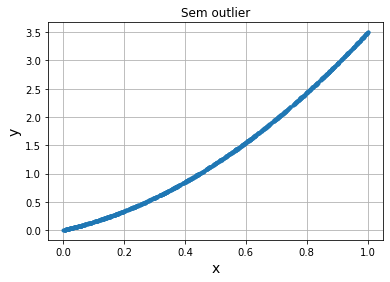

In [5]:
plt.plot(x, y, '.')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title('Sem outlier')
plt.grid()
plt.show()

In [6]:
# Instantiate a polynomial.
# Generate a new feature matrix consisting of all polynomial combinations 
# of the features.
poly = PolynomialFeatures(degree=2, include_bias=False)
# Instantiate a scaler.
scaler = StandardScaler()
# Instantiate a linear regressor.
reg = LinearRegression()

# Create a pipeline of actions.
# builds a composite estimator, as a chain of transforms and estimators.
poly_reg = Pipeline([
    ("poly", poly),
    ("scaler", scaler),
    ("reg", reg),
])

# Perform polynomial regression.
poly_reg.fit(x, y)

# Use the trained model for prediction of the training set.
y_pred = poly_reg.predict(x)

print('MSE:', mean_squared_error(y, y_pred))

MSE: 1.0191177411216638e-31


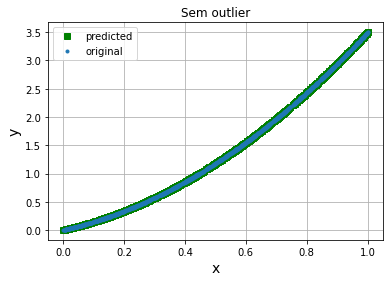

In [7]:
plt.plot(x, y_pred, 'gs', label='predicted')
plt.plot(x, y, '.', label='original')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title('Sem outlier')
plt.legend()
plt.grid()
plt.show()

### Adding outliers

In [8]:
M = 1

for i in range(0,M):
    x = np.append(x, np.random.rand())
    y = np.append(y, 1000*np.random.rand())

x = x.reshape(len(y), 1)
y = y.reshape(len(y), 1)

print('New data set has: '+ str(len(y)) + " elements")

New data set has: 1001 elements


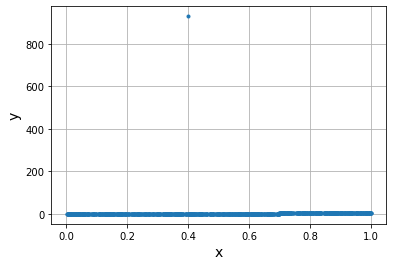

In [9]:
plt.plot(x, y, '.')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.grid()
plt.show()

In [10]:
# Instantiate a polynomial.
poly = PolynomialFeatures(degree=2, include_bias=False)
# Instantiate a scaler.
scaler = StandardScaler()
# Instantiate a linear regressor.
reg = LinearRegression()

# Create a pipeline of actions.
poly_reg = Pipeline([
    ("poly", poly),
    ("scaler", scaler),
    ("reg", reg),
])

# Perform polynomial regression.
poly_reg.fit(x, y)

# Use the trained model for prediction of the training set.
y_pred = poly_reg.predict(x)

print('MSE:', mean_squared_error(y, y_pred))

MSE: 861.7499587056442


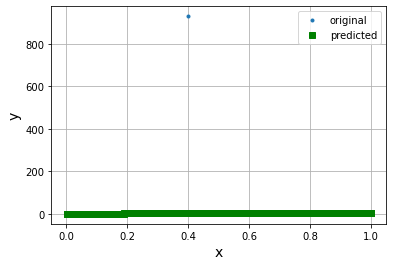

In [11]:
plt.plot(x, y, '.', label='original')
plt.plot(x, y_pred, 'gs', label='predicted')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend()
plt.grid()
plt.show()

### Zooming in

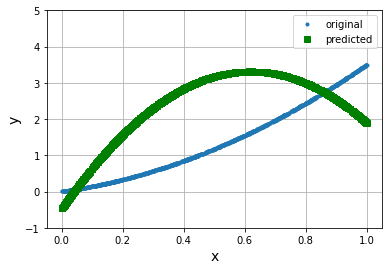

In [11]:
plt.plot(x, y, '.', label='original')
plt.plot(x, y_pred, 'gs', label='predicted')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend()
plt.ylim([-1,5])
plt.grid()
plt.show()